# Mathematical Underpinnings - Lab 2

In [26]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

## Task 1

### a)

$$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = \mathbb{E}(aX - (X + \epsilon)^2) = a^2 \mathbb{E} X^2 - 2a \mathbb{E} X(X+\epsilon) + \mathbb{E} (X + \epsilon)^2 = \star,$$

$$\mathbb{E}X^2 = Var X + (\mathbb{E} X )^2 = 1 + 0^2 = 1,$$

$$\mathbb{E} X(X+\epsilon) = \mathbb{E}X^2 + \mathbb{E}X\epsilon = 1 + \mathbb{E}X \mathbb{E}\epsilon = 1 + 0 = 1,$$

$$\mathbb{E}(X+\epsilon)^2 = \mathbb{E} (X^2 + 2X\epsilon + \epsilon^2) = \mathbb{E}X^2 + 2 \mathbb{E}X\epsilon + \mathbb{E} \epsilon^2 = 1 + 0 + Var\epsilon + (\mathbb{E}\epsilon)^2 = 1 + \sigma^2.$$

Thus,

$$\star = a^2 - 2a + 1 + \sigma^2 = (a-1)^2 + \sigma^2.$$

In our task we know $a^* = 1$.

In [27]:
def population_risk(a, sigma_eps):
    return (a - 1) ** 2 + sigma_eps ** 2

### b)

In [28]:
# sampling

n = 50
sigma_eps = 1
X = np.random.normal(0, 1, n)
a = 1
Y = a * X + np.random.normal(0, sigma_eps, n)

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [29]:
def empirical_risk(a, x, y):
    return np.sum((a * x - y) ** 2) / y.shape[0]

### c)

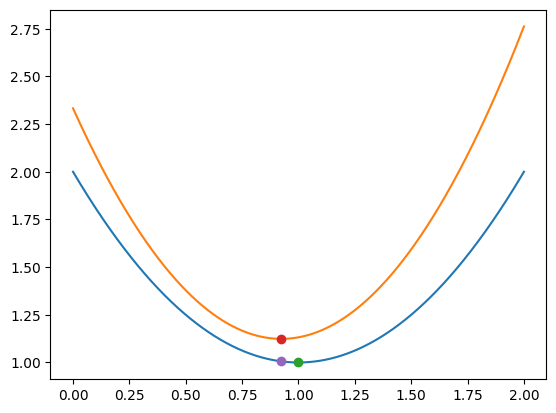

In [30]:
# code, plot

N = 1001
a = np.linspace(0, 2, num=N)

pop_risk = population_risk(a, sigma_eps)
min_pop_risk = min(pop_risk)
min_pop_risk_idx = list(pop_risk).index(min_pop_risk)

emp_risk = []
for a_i in a:
    emp_risk.append(empirical_risk(a_i, X, Y)) 
min_emp_risk = min(emp_risk)
min_emp_risk_idx = emp_risk.index(min_emp_risk)

plt.plot(a, pop_risk)
plt.plot(a, emp_risk)
plt.plot(a[min_pop_risk_idx], min_pop_risk, "o")
plt.plot(a[min_emp_risk_idx], min_emp_risk, "o")
plt.plot(a[min_emp_risk_idx], pop_risk[min_emp_risk_idx], "o")
plt.show()

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [31]:
# excess risk

def excess_risk(a_hat, a0, sigma_eps):
    return population_risk(a_hat, sigma_eps) - population_risk(a0, sigma_eps)

a0 = a[min_pop_risk_idx]
a_hat = a[min_emp_risk_idx]
sigma = pop_risk[min_emp_risk_idx]
print(excess_risk(a_hat, a0, sigma))

0.005776000000000003


In [32]:
from sklearn.linear_model import LinearRegression

# simulations with fixed sample size

n, L = 50, 200
excess_risk_seq = np.zeros(L)

for i in range(L):
    x = np.random.normal(0, 1, n)
    eps = np.random.normal(0, sigma, n)
    y = a0 * x + eps

    mod = LinearRegression()
    mod.fit(x.reshape(-1, 1), y)
    a_hat = mod.coef_[0]

    excess_risk_seq[i] = population_risk(a_hat, sigma) - population_risk(a0, sigma)

print(np.mean(excess_risk_seq))

0.025611901878256363


In [38]:
# simulations for various sample sizes

N = 1001
a = np.linspace(-5, 5, num=N)
n_seq = [25, 50, 75] + [100 * i for i in range(1, 6)] + [1000]
means = []
for n in n_seq:
    excess_risk_seq = np.zeros(L)
    for i in range(L):
        x = np.random.normal(0, 1, n)
        eps = np.random.normal(0, sigma, n)
        y = a0 * x + eps
        
        mod = LinearRegression()
        mod.fit(x.reshape(-1, 1), y)
        a_hat = mod.coef_[0]

        excess_risk_seq[i] = excess_risk(a_hat, a0, sigma)

    means.append(np.mean(excess_risk_seq))

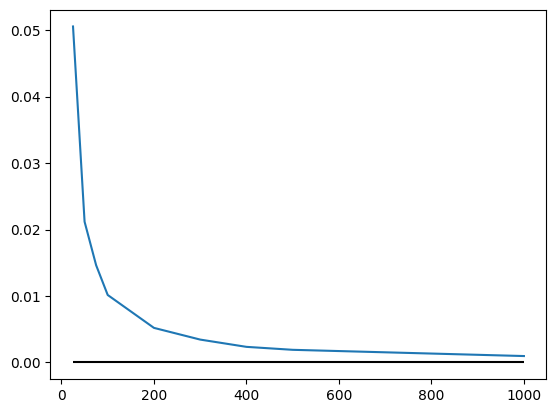

In [39]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)

plt.plot(n_seq, means)
plt.hlines(0, 25, max(n_seq), color='black')
plt.show()